<a href="https://colab.research.google.com/github/Kerly811/Estadistica1_TercerParcial/blob/main/Estad%C3%ADstica_TercerParcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

# Estadística descriptiva para variables cualitativas

*   Graficos para datos de una variable cualitativa.
*   Proporciones asociadas a los valores de una variable cualitativa.







In [3]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [17]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [8]:
tabla1 = tabla[["EDAD_MADRE", "IDHEMOCLAS", "IDFACTORRH"]]
tabla1.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,1,1
11,6,1,1
11,5,3,1
11,5,3,1


In [9]:
df2 = tabla1[(tabla1.EDAD_MADRE < 99) & (tabla1["IDHEMOCLAS"] != 9) & (tabla1.IDFACTORRH != 9)]
df2.head(4)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,5,1,1
11,6,1,1
11,5,3,1
11,5,3,1


In [10]:
df2.EDAD_MADRE.head(2)
df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)
df2.EDAD_MADRE.head(2)

<ipython-input-10-ced7eb983115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.EDAD_MADRE = df2.EDAD_MADRE.astype(str)


,EDAD_MADRE
COD_DPTO,
23,5
11,6


In [11]:
df2.loc[(df2.EDAD_MADRE == "1"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "2"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "3"), "EDAD_MADRE"], df2.loc[(df2.EDAD_MADRE == "4"), 'EDAD_MADRE'] = "10-14", "15-19", "20-24", "25-29"
df2.loc[(df2.EDAD_MADRE == "5"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "6"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "7"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "8"), 'EDAD_MADRE'] = "30-34", "35-39", "40-44", "45-49"
df2.loc[(df2.EDAD_MADRE == "9"), 'EDAD_MADRE'], df2.loc[(df2.EDAD_MADRE == "99"), 'EDAD_MADRE'] = "50-55", "NA"
df2.head(5)

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,30-34,1,1
11,35-39,1,1
11,30-34,3,1
11,30-34,3,1
11,30-34,3,1


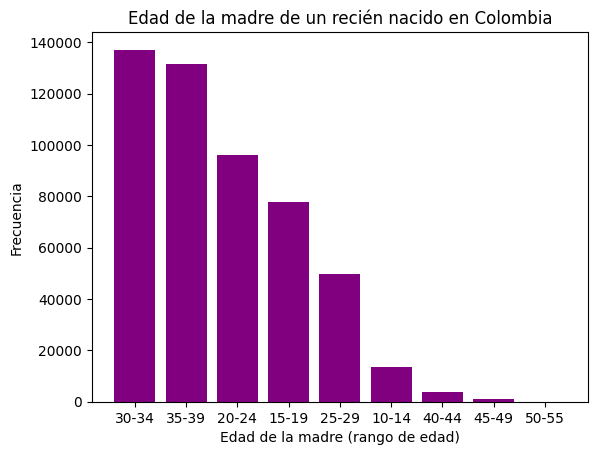

In [18]:
x_values = df2.EDAD_MADRE.unique()
y_values = df2.EDAD_MADRE.value_counts().tolist()
plt.bar(x_values, y_values, color = "purple")
plt.title('Edad de la madre de un recién nacido en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Edad de la madre (rango de edad)')
ax.set_ylabel('Frecuencia')
plt.show()


El valor de 30 a 34 años es el rango de edad donde se tienen alrededor de 140000 madres de recién nacidos en Colombia, y es donde se tienen más madres. En rango de edad de 25 a 29 años se tienen aproximadamente 60000 madres de recién nacidos en Colombia. Los rangos de edades de 10 a 14 años, de 40 a 44 años, de 45 a 49 años y de 50 a 55 años tienen menos de 20000 madres de recién nacidos en Colombia.

In [19]:
sizes = np.array(y_values)
sizes

array([137164, 131625,  96094,  77699,  49789,  13534,   3778,    923,
           46])

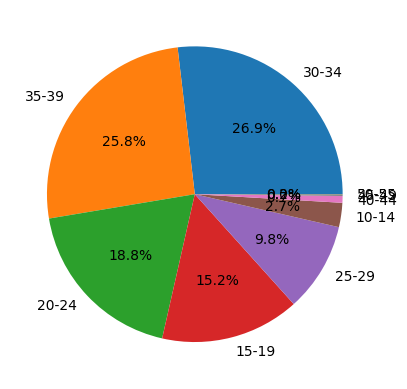

In [20]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [21]:
len(df2.EDAD_MADRE)

510652

In [22]:
porcentaje = [(x/len(df2.EDAD_MADRE)*100) for x in y_values]
print(x_values)
print(porcentaje)

['30-34' '35-39' '20-24' '15-19' '25-29' '10-14' '40-44' '45-49' '50-55']
[26.86056257490424, 25.775870847465594, 18.817903386259136, 15.215645880168882, 9.750084206073803, 2.650337215951372, 0.7398384810007599, 0.18074931656000562, 0.009008091616208299]


Aproximadamente el 26.86% de las madres de recién nacidos en Colombia tiene entre 30 y 34 años, el 25.77% entre 35 y 39 años, el 18.81% entre 20 y 24 años, el 15.21% entre 15 y 19 años, el 9.75% entre 25 y 29 años, el 2.65% entre 10 y 14 años, el 0.73% entre 40 y 44 años, el 0.18% entre 45 y 49 años, y el 0.009% entre 50 y 55 años.

# Tablas de contigencia


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [23]:
df2.loc[(df2.IDHEMOCLAS == 1), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 2), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 3), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4), "IDHEMOCLAS"] = "A", "B", "O", "AB"
df2.loc[(df2.IDFACTORRH == 1), "IDFACTORRH"], df2.loc[(df2.IDFACTORRH == 2), "IDFACTORRH"] = "Positivo", "Negativo"
df2.IDHEMOCLAS, df2.IDFACTORRH = df2.IDHEMOCLAS.astype(str), df2.IDFACTORRH.astype(str)
df2.head(3)


<ipython-input-23-0fe756aa7aa9>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'A' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDHEMOCLAS == 1), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 2), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 3), "IDHEMOCLAS"], df2.loc[(df2.IDHEMOCLAS == 4), "IDHEMOCLAS"] = "A", "B", "O", "AB"
<ipython-input-23-0fe756aa7aa9>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Positivo' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[(df2.IDFACTORRH == 1), "IDFACTORRH"], df2.loc[(df2.IDFACTORRH == 2), "IDFACTORRH"] = "Positivo", "Negativo"
<ipython-input-23-0fe756aa7aa9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,EDAD_MADRE,IDHEMOCLAS,IDFACTORRH
COD_DPTO,,,
23,30-34,A,Positivo
11,35-39,A,Positivo
11,30-34,O,Positivo


In [24]:
tabla_cont = pd.crosstab(df2.IDHEMOCLAS, df2["IDFACTORRH"])
tabla_cont

IDFACTORRH,Negativo,Positivo
IDHEMOCLAS,,
A,6358,121758
AB,417,8465
B,2219,45069
O,14746,311620


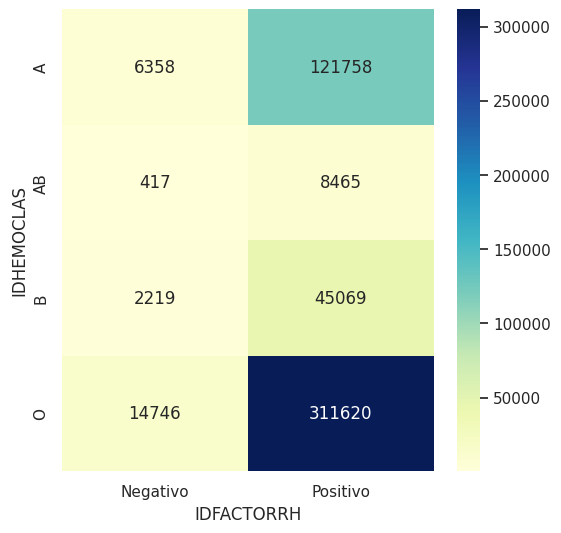

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()

In [26]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")


El valor de la estadística Chi cuadrado es 41.272316570796086 y el valor p es d 5.724851648190839e-09




*   Si valor p < 0.05 se rechaza la hipótesis nula
*   Si valor p > 0.05 no se rechaza la hipótesis nula

Como el valor p $=5.724851648190839\times10^{-09} < 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que la hemoclasificación y el factor RH estén asociadas para los individuos recién nacidos en Colombia.



In [27]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.IDFACTORRH)))
coeficiente_phi = math.sqrt(chi/len(df2.IDFACTORRH))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.IDFACTORRH)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.008989786023325263, 0.008990149305754447 y 0.008990149305754447


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310), se tiene que la hemoclasificación y el factor RH están insignificantemente asociados.

Interpretación general


*   Y depende ____ de X
*   X y Y son ______ homogénas
*   X y Y están ______ asociadas

Donde ______ = nula ($Chi , \phi, V=0$) ______ = insignificantemente ($0 < Chi, \phi, V < 0.2$),______ = discretamente ($0.2 < Chi, \phi, V < 0.4$), ______ = moderadamente, ($0.4 < Chi, \phi, V < 0.6$) ______ = sustancialmente ($0.6 < Chi, \phi, V < 0.8$) y ______ = fuertemente($0.8 < Chi, \phi, V < 1$ )



